In [1]:
import sys
sys.path.append("..")
import torch as t
from transformers import AutoTokenizer
from lib import backprop_functions
from transformers import GPT2Tokenizer, GPT2LMHeadModel, AdamW
import matplotlib.pyplot as plt
device = t.device("cuda" if t.cuda.is_available() else "cpu")
import numpy as np
import einops

/root/miniconda/envs/my_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2').to(device)

In [3]:

tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = 'left'

In [4]:
magic_token_vector = backprop_functions.intialise_random_token_vector(model)
input_text = [
    "The capitol of magic is",
    "The most famous site in magic is the",
    "East of magic is",
    "West of magic is",
    ]
magic_word = " magic"
target_words = [" Paris"," Eiffel Tower", " Germany", " Spain"]

input_text = [
    "My first name is magic. My last name is",
    "My name is magic. I am the",
    ]
magic_word = " magic"
target_words = [" Obama", " President"]

target_token_id = [tokenizer.encode(word)[0] for word in target_words]

#n = 1

#input_text = input_text[n]
#target_token_id = target_token_id[n]

tokens, magic_word_pos = backprop_functions.tokenize_input(tokenizer, input_text, magic_word)


/root/ARENA-Hackathon/demos/../lib/backprop_functions.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tokens = t.tensor(tokens)


In [5]:
magic_token_vector = backprop_functions.intialise_random_token_vector(model)
losses, logs = backprop_functions.train_token_vector(model,tokens,magic_word_pos,target_token_id,magic_token_vector, lr=.001, epochs=300,accuracy_lambda = 1., l1_lambda=.1, kl_lambda = 0.)

/root/miniconda/envs/my_env/lib/python3.9/site-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Training Progress: 100%|██████████| 300/300 [00:08<00:00, 33.49it/s, Loss=5.81, Accuracy Loss=0.195, L1 Loss=5.62, KL Loss=0] 


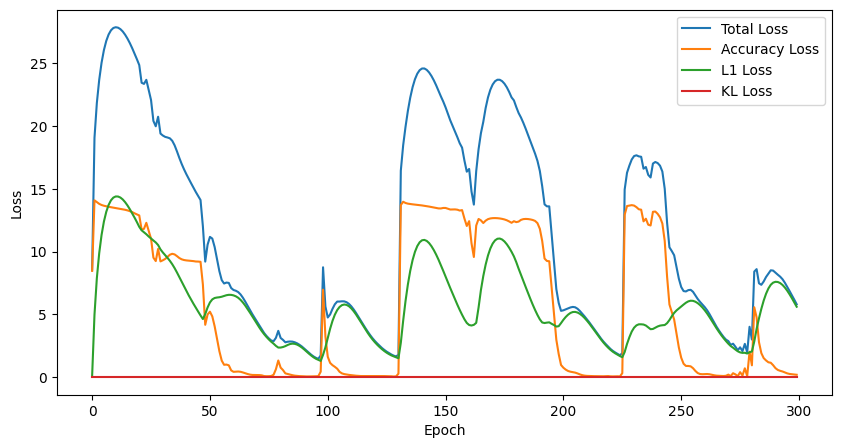

In [6]:
backprop_functions.plot_loss(losses)

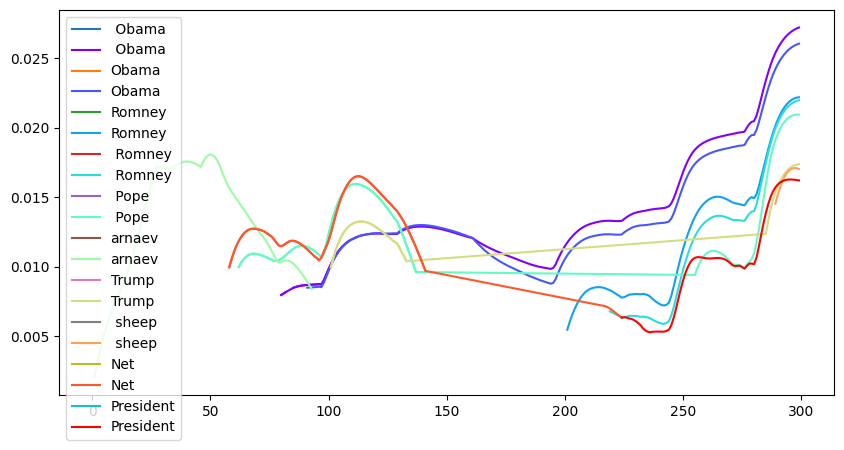

In [7]:
backprop_functions.plot_best_tokens(logs,tokenizer,n_plots=10)

In [2]:
import torch as t

In [100]:
probability_destribution = t.tensor([0.1,0.2,0.3,0.4]).log()
comparison_lists = t.tensor([[0.1,0.1,0.1,0.7],[0.1,0.1,0.7,0.1],[0.1,0.7,0.1,0.1],[0.7,0.1,0.1,0.1]]).log()

kl_divs_torch = [t.nn.functional.kl_div(probability_destribution, comparison, log_target=True, reduction='sum') for comparison in comparison_lists]


In [101]:
kl_divs

tensor([0.2444, 0.4390, 0.6335, 0.8281])

In [89]:
kl_divs = t.nn.functional.kl_div(probability_destribution.repeat(4,1),comparison_lists, reduction='none', log_target=True).sum(0)

In [90]:
kl_divs

tensor([ 1.3621,  0.6690,  0.2635, -0.0242])

In [105]:
kl_divs = ((probability_destribution.repeat(4,1)-comparison_lists)*(probability_destribution.exp())).sum(1).mean()

In [106]:
kl_divs

tensor(0.5363)

In [11]:
input_text = [
    "My first name is magic. My last name is",
    "My name is magic. I am the",
    ]
tokens, magic_word_pos = backprop_functions.tokenize_input(tokenizer, input_text, magic_word)
logits = model.forward(tokens.to(device)).logits

/root/ARENA-Hackathon/demos/../lib/backprop_functions.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tokens = t.tensor(tokens)


In [21]:
magic_logits = logits[magic_word_pos[0], magic_word_pos[1] - 1, :]

In [34]:
p_1 = t.nn.functional.softmax(magic_logits[0], dim=0)
p_2 = t.nn.functional.softmax(magic_logits[1], dim=0)
backprop_functions.KL_div(p_1, p_2)

tensor(4.5498e-05, device='cuda:0', grad_fn=<MeanBackward0>)

In [32]:

max_5_logits = t.topk(magic_logits, 5).indices
print(max_5_logits)
for max_5 in max_5_logits:
    for va in max_5:
        print(va)
        #print(t.exp(logi[va]))
        print(tokenizer.decode([va]))


tensor([[ 407, 1757,  257, 3271,  616],
        [1757, 3271, 3899, 5180, 4705]], device='cuda:0')
tensor(407, device='cuda:0')
 not
tensor(1757, device='cuda:0')
 John
tensor(257, device='cuda:0')
 a
tensor(3271, device='cuda:0')
 David
tensor(616, device='cuda:0')
 my
tensor(1757, device='cuda:0')
 John
tensor(3271, device='cuda:0')
 David
tensor(3899, device='cuda:0')
 Michael
tensor(5180, device='cuda:0')
 Chris
tensor(4705, device='cuda:0')
 Matt
